Импортируем вспомогательную библиотеку - визуализатор:

In [1]:
from pandas import date_range,Series,DataFrame,read_csv, qcut
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Считываем интересующие нас данные по валютной паре Эфир-Биткойн:

In [2]:
eth_btc_data = read_csv('../../data/vwapHourlyETHBTC.csv', header=0)
eth_btc_data


,Timestamp,Date,Vwap (ETHBTC),Volume
0,1518210000,2018-02-09 21:00:00,0.100881,1379.896945
1,1518206400,2018-02-09 20:00:00,0.100806,703.197402
2,1518202800,2018-02-09 19:00:00,0.100771,1047.175093
3,1518199200,2018-02-09 18:00:00,0.101089,1861.668501
4,1518195600,2018-02-09 17:00:00,0.101535,1932.273074
5,1518192000,2018-02-09 16:00:00,0.101328,1330.419805
6,1518188400,2018-02-09 15:00:00,0.100857,4570.228407
7,1518184800,2018-02-09 14:00:00,0.100539,689.166870
8,1518181200,2018-02-09 13:00:00,0.100630,995.678502
9,1518177600,2018-02-09 12:00:00,0.100415,1666.718541


Отсеиваем таймстемпы и объемы, оставляя только дату и соотношение цен

In [15]:
eth_btc_date_and_vwap = eth_btc_data[['Date', 'Vwap (ETHBTC)']]
eth_btc_date_and_vwap

,Date,Vwap (ETHBTC)
0,2018-02-09 21:00:00,0.100881
1,2018-02-09 20:00:00,0.100806
2,2018-02-09 19:00:00,0.100771
3,2018-02-09 18:00:00,0.101089
4,2018-02-09 17:00:00,0.101535
5,2018-02-09 16:00:00,0.101328
6,2018-02-09 15:00:00,0.100857
7,2018-02-09 14:00:00,0.100539
8,2018-02-09 13:00:00,0.100630
9,2018-02-09 12:00:00,0.100415


Теперь пробуем нарисовать график изменения цены с течением времени

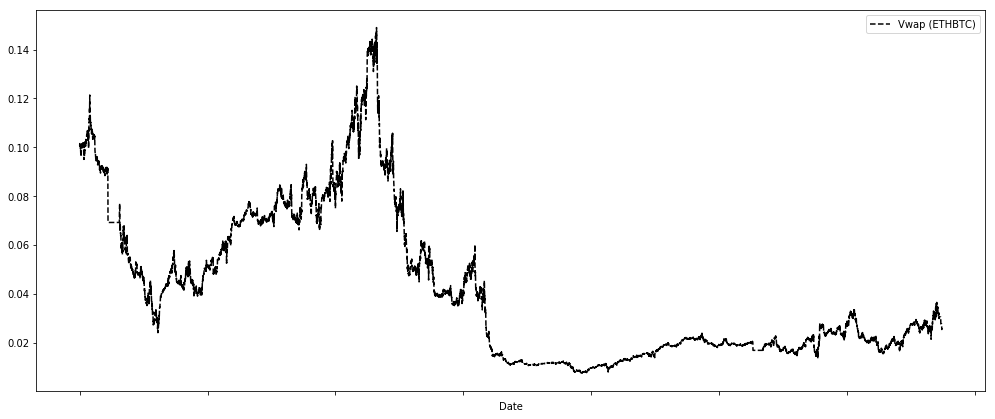

In [30]:
eth_btc_date_and_vwap.plot(x = 'Date', figsize=(17, 7), style='k--', kind='line')

In [ ]:
Отлично. Проделаем аналогичную работу для валютных пар Эфир-Доллар и :

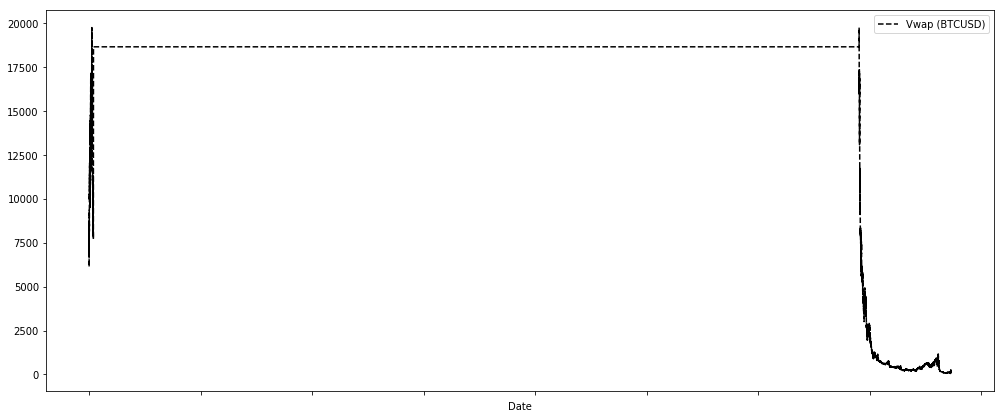

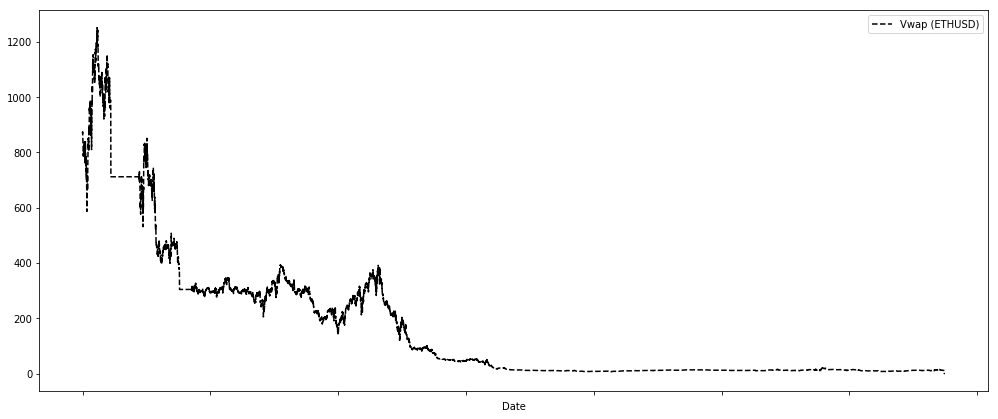

In [36]:
btc_usd_data = read_csv('../../data/vwapHourlyBTCUSD.csv', header=0)
btc_usd_date_and_vwap = btc_usd_data[['Date', 'Vwap (BTCUSD)']]
btc_usd_date_and_vwap.plot(x = 'Date', figsize=(17, 7), style='k--', kind='line')

eth_usd_data = read_csv('../../data/vwapHourlyETHUSD.csv', header=0)
eth_usd_date_and_vwap = eth_usd_data[['Date', 'Vwap (ETHUSD)']]
eth_usd_date_and_vwap.plot(x = 'Date', figsize=(17, 7), style='k--', kind='line')

Можно заметить, что график валютной пары Биткоин-Доллар имеет несколько странный вид. Я думаю, что это связанно с прекращением на некоторое время торгов по этому инструменту на бирже bitmex. Возможно, потерянные данные мы восстановим, используя статистики из других источников.

Пока что можно сказать, что попытка визуализировать данные довольно успешна: мы явно можем отследить активность торгов и сделать из этого выводы, касающиеся темы  проекта.